# 1. 데이터 다운로드

> 다음 사이트에서 데이터 다운로드
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

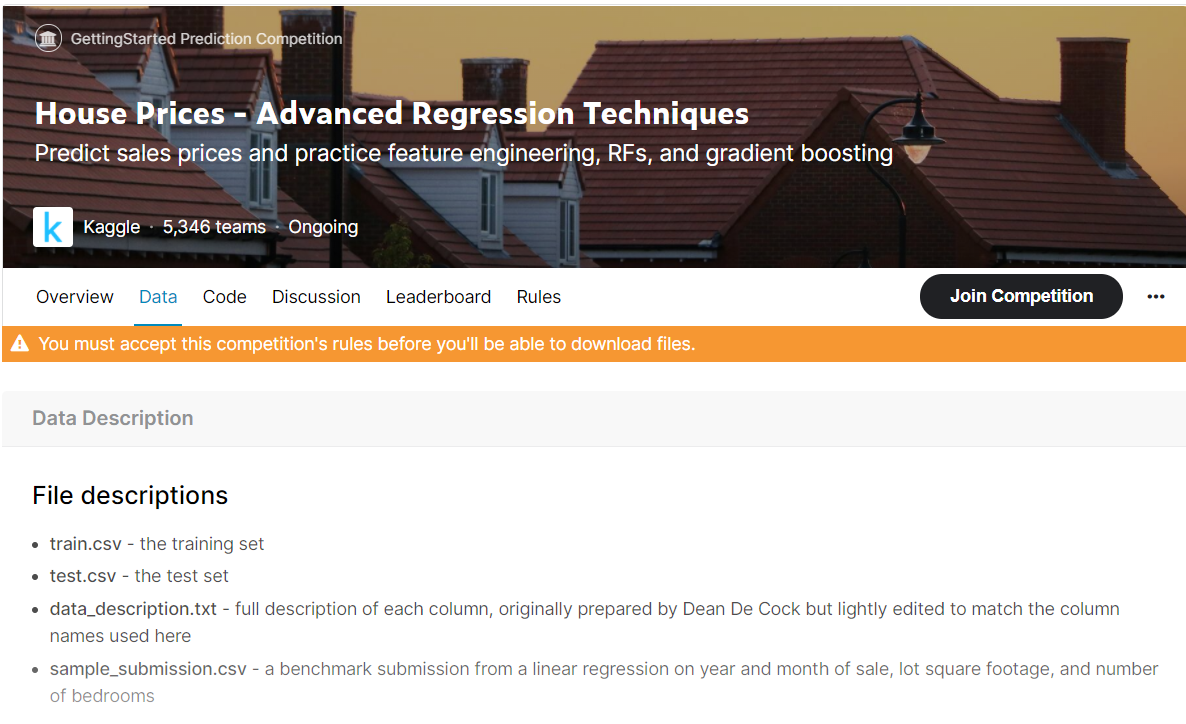

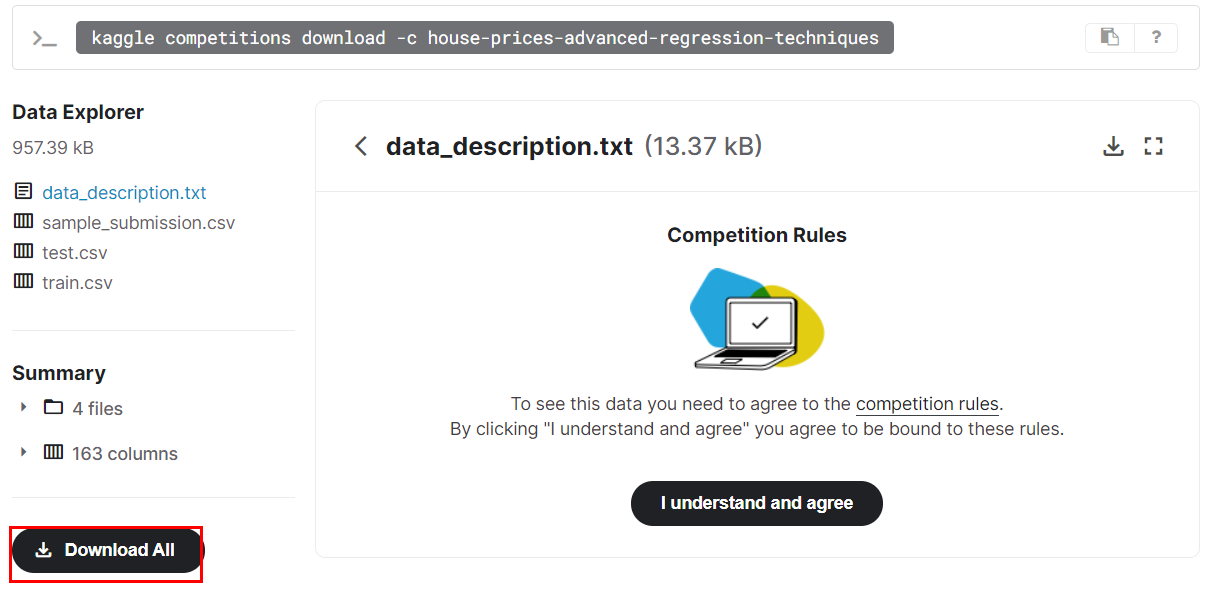

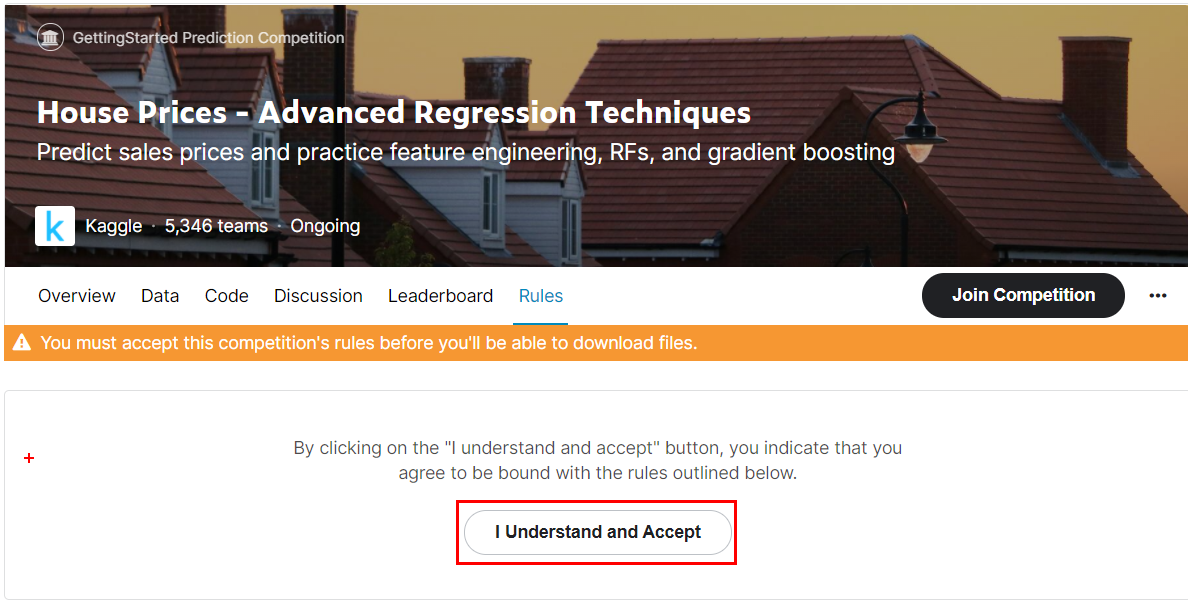

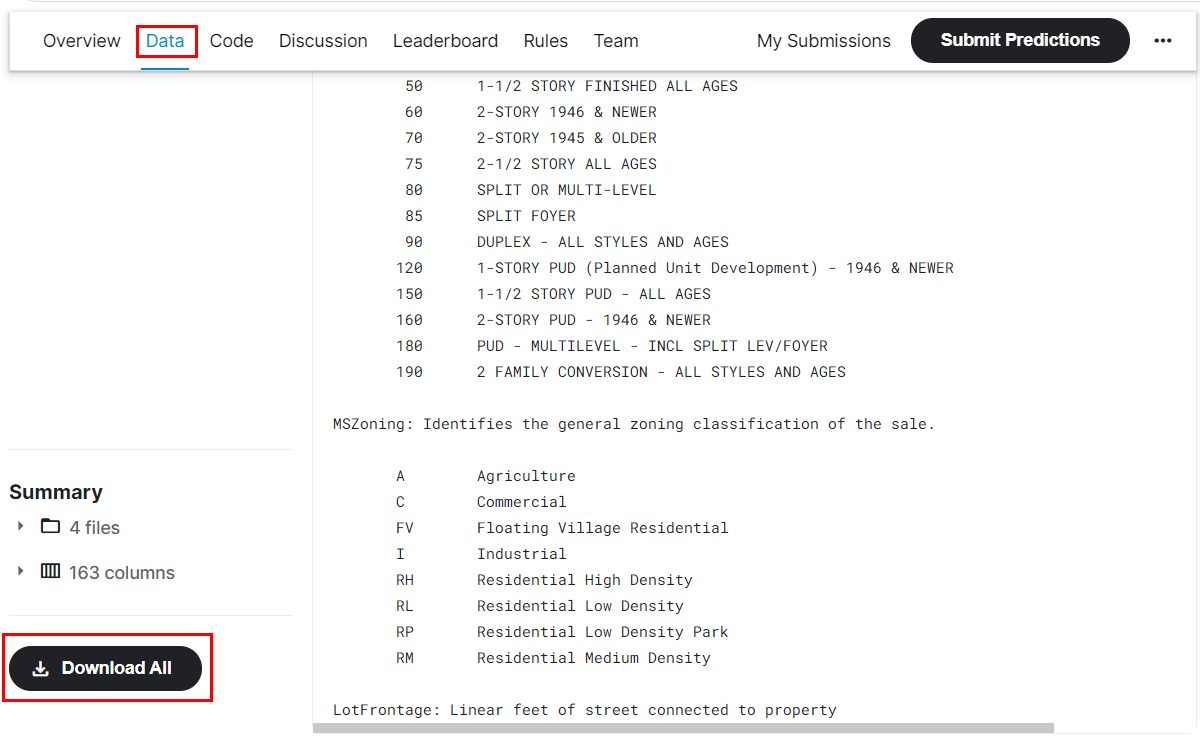

# 2. 데이터 분석

- MSSubClass: 판매할 집 형태
 - ex) 1-STORY 1946 & NEWER ALL STYLES(단층 1946년 이후 신식모델)
- MSZoning: 주거 용도 

## 2.1 파일 읽기

In [2]:
import pandas as pd

dir_path = 'data/house-prices'
train_file = dir_path + '/train.csv'

df_train = pd.read_csv(train_file)
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


> 81개의 feature 정보가 있는 것을 알 수 있다.

# 3. 데이터 전처리

## 3.1 feature 확인

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# dtype : 데이터 프레임에서 단일 컬럼의 자료형
# dtypes : 데이터 프레임 전체의 자료형
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

> 1460개의 데이터가 존재하며 feature는 object형 43, int형 35, float형 3개로 총 81개의 feature가 존재한다.

## 3.2 결측치 처리

In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
isnull_series = df_train.isnull().sum()

In [9]:
isnull_series[isnull_series > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
isnull_series[isnull_series > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

> 각 feature별 null 개수를 확인해 봤다.

> 총 1460개의 데이터 중 1000개가 넘는 feature 정보를 확인해 보자
- PoolQC : 수영장의 종류
- MiscFeature : 기타정보(엘리베이터, 창고 테니스 코트 등)
- Alley : 포장상태(자갈, 아스팔트)
- Fence : 울타리 종류

> 위의 내용들은 분명 집값에 크나큰 영향을 줄 것이다. 하지만 데이터가 너무 부족하기 때문에 오히려 과적합될 확률이 높다. 따라서 이러한 부분들을 배제하고 모델을 만들것이다.

> FireplaceQu : 벽난로의 품질을 뜻한다. 비록 1000개가 넘진 않지만 50%가까이 null이 존재함으로 이 부분도 배제하자.

In [11]:
df_house = df_train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
df_house = df_house.fillna(df_house.mean(numeric_only=True))

In [12]:
df_house.isnull().sum().sum()

np.int64(1384)

> 위에서 언급된 내용들은 배제하고 수치형 null은 평균으로 대표값을 설정한다.

## 3.3 가격 분포

<Axes: title={'center': 'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Count'>

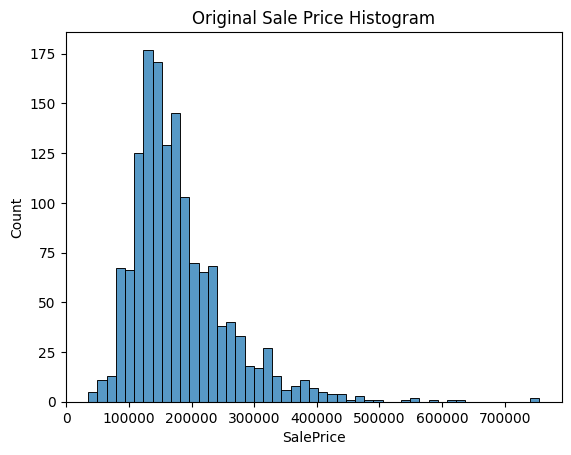

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Original Sale Price Histogram')
sns.histplot(df_house['SalePrice'])

> 실행결과 왼쪽으로 쏠려 있는 것을 볼 수 있다.

<Axes: title={'center': 'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Count'>

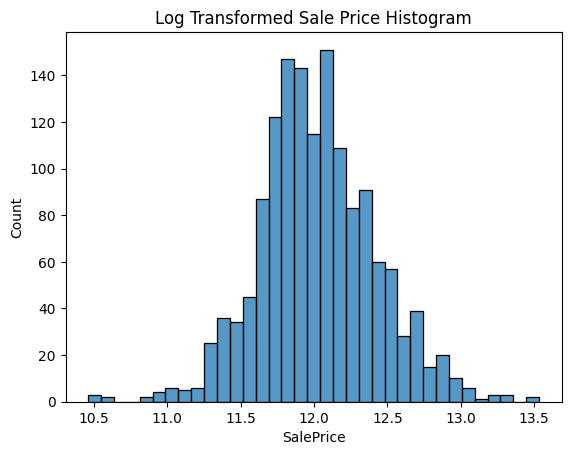

In [14]:
import numpy as np

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(df_house['SalePrice'])
sns.histplot(log_SalePrice)

In [15]:
df_house['SalePrice'] = np.log1p(df_train['SalePrice'])

> 데이터를 log로 변환한 결과 정규분포 형태로 나타나는 것을 볼 수 있다. 따라서 가격은 log로 변환한 데이터를 사용할 것이다.

## 3.4 원-핫 인코딩

### 3.4.1 null 객체 확인

In [16]:
null_column_count = df_house.isnull().sum()[df_house.isnull().sum() > 0]
print('## Null Feature의 type')
print(df_house.dtypes[null_column_count.index])

## Null Feature의 type
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


> null이 존재하는 값들의 타입을 확인해 봤더니 문자열형으로 나타난다. 이 값들은 get_dummies()를 이용하여 원-핫 인코딩을 진행할 것이다.

### 3.4.2 원-핫 인코딩 변환

In [17]:
df_house_ohe = pd.get_dummies(df_house)

null_column_count = df_house_ohe.isnull().sum()[df_house_ohe.isnull().sum() > 0]
print('## Null Feature의 type')
print(df_house_ohe.dtypes[null_column_count.index])

## Null Feature의 type
Series([], dtype: object)


### 3.4.3 결과 확인

In [18]:
df_house_ohe.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False


> 데이터 확인을 위해 결과를 출력해 보았지만 feature가 너무 많아 확인이 어렵다. null값으로 나왔던 데이터 중 첫 번째 데이터인 MasVnrType을 확인해 보자.

### 3.4.4 특정 feature 추출

> 원-핫 인코딩을 하게 되면 기존 feature에 추가로 내부 데이터명을 넣는다. 변경된 데이터를 모두 알 수 없음으로 기존 feature 정보가 포함되어 있는 feature를 찾아 출력해 보자.

In [19]:
ohe_list = df_house_ohe.columns.tolist()
ohe_list[:5]

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']

In [20]:
MasVnrTypes = [s for s in ohe_list if 'MasVnrType' in s]
MasVnrTypes

['MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_Stone']

In [21]:
MasVnrTypes_Index = [i for i in range(len(ohe_list)) if 'MasVnrType' in ohe_list[i]]
MasVnrTypes_Index

[162, 163, 164]

In [22]:
df_house_ohe[MasVnrTypes].head()

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,False,True,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,False


In [23]:
df_house_ohe.iloc[:5, MasVnrTypes_Index]

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,False,True,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,False


In [24]:
df_house_ohe.loc[:5, MasVnrTypes]

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,False,True,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,False
5,False,False,False


# 4. 모델

## 4.1 RMSE

In [25]:
from sklearn.metrics import mean_squared_error

def get_rmse(model, X_test, y_test):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(model.__class__.__name__, ' 로그 변환된 RMSE :', np.round(rmse, 3))
    return rmse

def get_rmses(models, X_test, y_test):
    rmses = []
    for model in models:
        rmse = get_rmse(model, X_test, y_test)
        rmses.append(rmse)

    return rmses

## 4.2 데이터 만들기

In [26]:
from sklearn.model_selection import train_test_split

y_target = df_house_ohe['SalePrice']
X_features = df_house_ohe.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=20)

## 4.3 모델 만들기

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

## 4.4 성능평가

In [28]:
models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)

LinearRegression  로그 변환된 RMSE : 0.124
Ridge  로그 변환된 RMSE : 0.121
Lasso  로그 변환된 RMSE : 0.167


[np.float64(0.12425897049141947),
 np.float64(0.12068310759072358),
 np.float64(0.1671189140204735)]

# 5. 하이퍼 파라미터

## 5.1 feature 확인하기

In [29]:
lr.coef_

array([-2.57099294e-04,  2.77003053e-04,  3.22018912e-06,  4.30090546e-02,
        3.42684355e-02,  1.72597404e-03,  7.48426267e-04,  1.67409751e-05,
        4.65480726e-05,  4.78371056e-05, -6.68186235e-06,  8.77031623e-05,
        6.25442607e-05,  5.96105933e-05,  2.32475289e-05,  1.45402639e-04,
        1.91580321e-02, -1.50264640e-03,  2.45119398e-02,  2.68617917e-02,
        8.71035457e-03, -5.07883449e-02,  2.93294032e-03,  2.57857148e-02,
       -2.57246789e-04,  1.83827306e-02,  1.22803500e-04,  1.15008703e-04,
        1.04325393e-04,  1.16318023e-04,  1.86154832e-04,  2.08817406e-04,
        1.36694872e-04,  6.76940846e-07, -1.47551577e-03, -1.79631533e-03,
       -3.12843709e-01,  9.74652618e-02,  1.14514972e-01,  6.68137166e-02,
        3.40497582e-02, -5.43213477e-02,  5.43213477e-02, -1.68133151e-02,
       -3.60825429e-03,  2.82520102e-02, -7.83044076e-03, -6.60297337e-03,
        1.06210078e-02, -2.07214232e-02,  1.67033888e-02,  9.78384759e-02,
       -9.78384759e-02,  

> 각 모델별로 어떠한 회귀 계수를 사용했는지 알아보려 한다. 선형회귀의 각 feature 별 계수 정보를 확인해 보면 너무 많은 정보들이 있어 보기가 어렵다. 상, 하위 10개의 feature정보를 확인해 보자.

In [30]:
def get_top_bottom_coef(model, X_features, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [31]:
import matplotlib.pyplot as plt 

def visualize_coefficient(models, X_features):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()

    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model, X_features)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__ + 'Coeffiecients', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)

        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

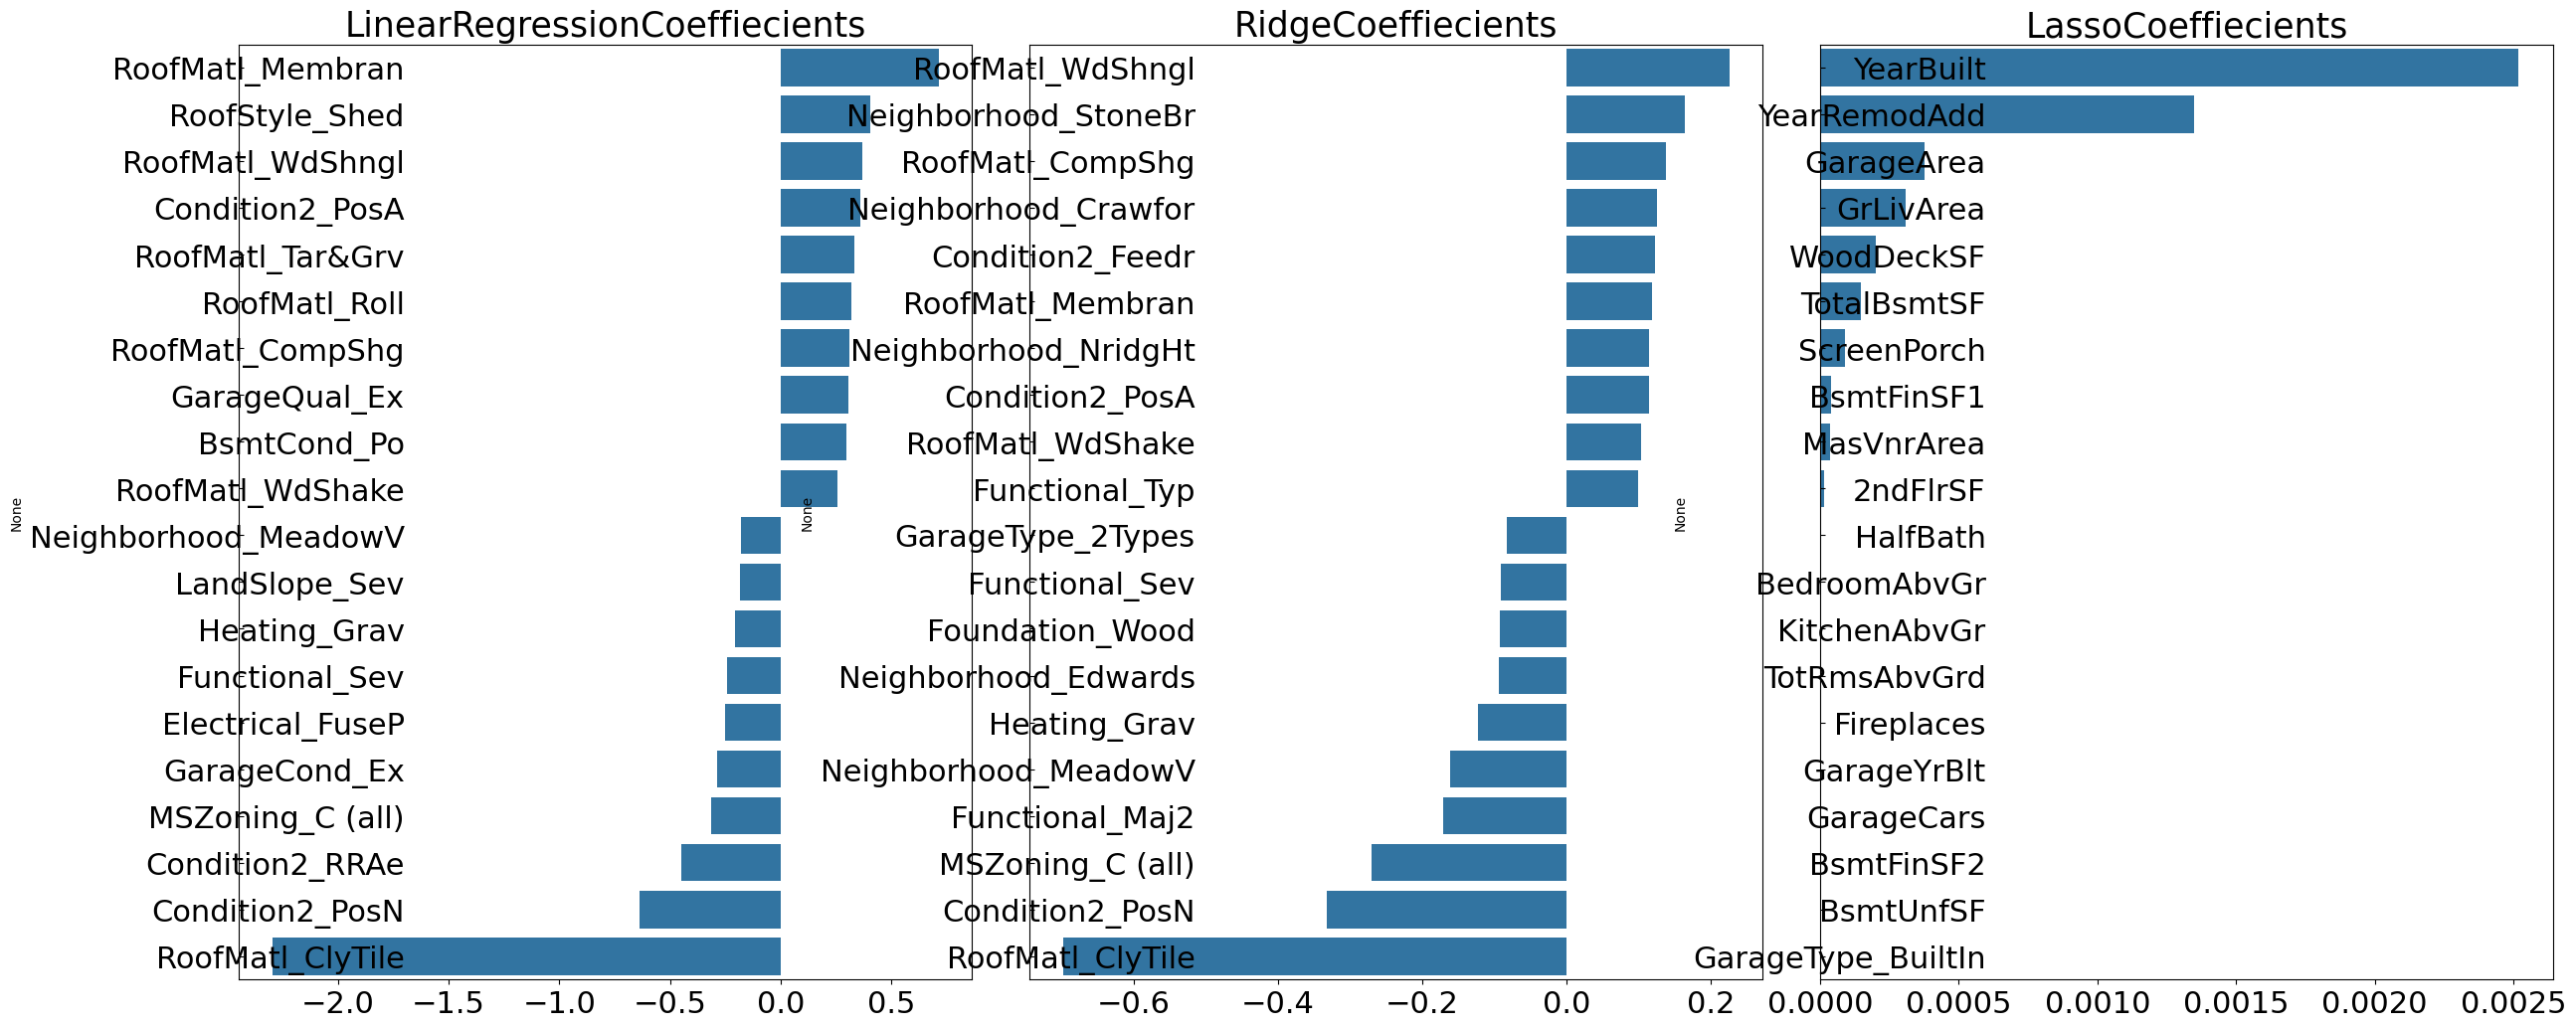

In [32]:
models = [lr, ridge, lasso]
visualize_coefficient(models, X_features)

> 실행결과 lasso의 회귀 계수는 몇몇을 제외하고 0을 갖는다. 또한 상위 2개는 너무 큰 값을 가지고 있다. 

## 5.2 교차 검증

> 위와 같은 상황이 과적합되어 그럴수도 있음으로 교차 검증으로 다시 한번 결과를 확인해 보자.

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, 
                                            scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'\n{model.__class__.__name__} CV RMSE 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} CV 평균 RMSE 값 : {rmse_avg:.3f}')

In [34]:
models = [lr, ridge, lasso]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트 : [0.135 0.165 0.167 0.111 0.198]
LinearRegression CV 평균 RMSE 값 : 0.155

Ridge CV RMSE 값 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값 : 0.144

Lasso CV RMSE 값 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값 : 0.198


> 역시 Lasso의 결과가 좋지 않다.

## 5.3 하이퍼 파라미터

In [35]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-grid_model.best_score_)

    print(f'\n{model.__class__.__name__} fold 5 최적 평균 RMSE 값 : {np.round(rmse,4)}')
    print(f'최적 alpha 값 : {grid_model.best_params_}')

    return grid_model.best_estimator_

In [36]:
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_ridge = print_best_params(ridge, ridge_params)
best_lasso = print_best_params(lasso, lasso_params)


Ridge fold 5 최적 평균 RMSE 값 : 0.1418
최적 alpha 값 : {'alpha': 12}

Lasso fold 5 최적 평균 RMSE 값 : 0.142
최적 alpha 값 : {'alpha': 0.001}


> 실행결과 최적의 파라미터로 alpha가 Ridge는 12, Lasso는 0.001로 나타났다.

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ridge = Ridge(alpha=12)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [38]:
models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)

LinearRegression  로그 변환된 RMSE : 0.124
Ridge  로그 변환된 RMSE : 0.122
Lasso  로그 변환된 RMSE : 0.117


[np.float64(0.12425897049141947),
 np.float64(0.12186017122869296),
 np.float64(0.11691945529197599)]

In [39]:
# LinearRegression  로그 변환된 RMSE : 0.124
# Ridge  로그 변환된 RMSE : 0.121
# Lasso  로그 변환된 RMSE : 0.167

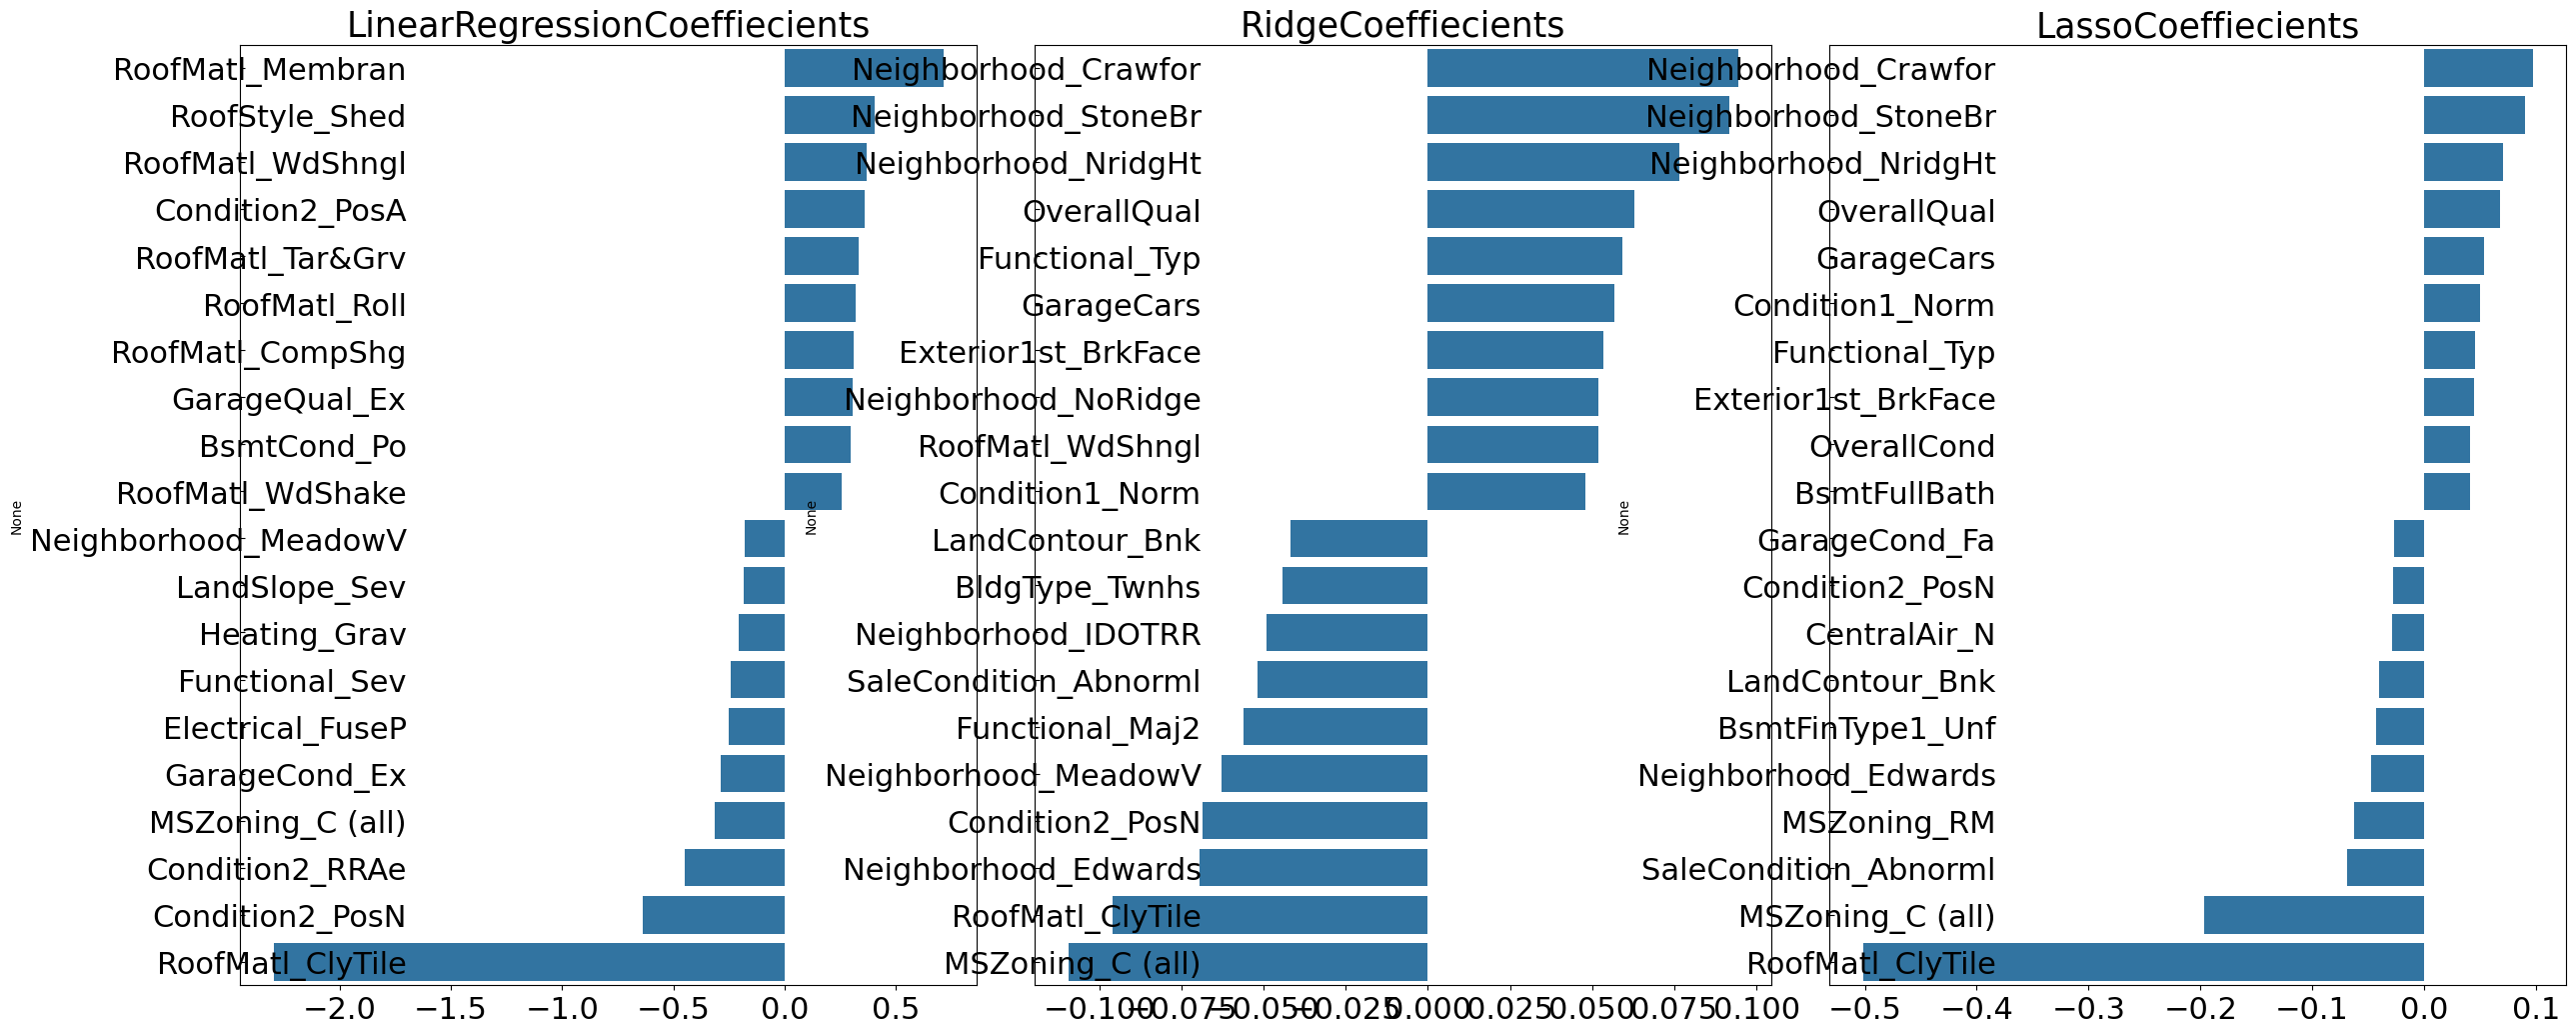

In [40]:
visualize_coefficient(models, X_features)

> 첫 번째 차트에서는 집 값을 지붕의 스타일이 가장 안좋은 모양이나 재질이 방수일 경우에 가격이 높다고 평가한 것이다. 두, 세 번째는 지역이 크로포드이거나 집 전체의 자재나 재질이 집값을 높다고 평가한 것이다. 

# 6. 왜곡

> 첫 실습 시 데이터 확인 결과 왜곡이 발생하여 log처리를 했었다. 정확히 어떠한 feature로 인해 왜곡되었는지는 알 수 없었다. 

> 문자열 데이터의 경우 존재 여부를 판단하는 1과 0으로 나타남으로 왜곡과는 관계가 없다. 결국 왜곡에 영향을 주는 것은 숫자이다. skew() 함수는 숫자에 대한 왜곡을 판단할 수 있으며 1보다 큰 경우 왜곡에 영향을 많이 주게 된다. 

## 6.1 수치 feature 추출

In [41]:
from scipy.stats import skew

features_index = df_house.dtypes[df_house.dtypes != 'object'].index
features_index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## 6.2 왜곡 feature 확인

In [42]:
df_house[features_index]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,11.864469


In [43]:
skew_features = df_house[features_index].apply(lambda x: skew(x))
skew_features

MSSubClass        1.406210
LotFrontage       2.382499
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.673661
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.667488
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
SalePrice         0.121222
d

## 6.3 왜곡 강도가 높은 데이터 log화

In [44]:
# scipy.skew 의 값이 0 이면 대칭
# scipy.skew 의 값이 양수면 오른쪽이 길다.
# scipy.skew 의 값이 음수면 왼쪽이 길다
skew_features_top = skew_features[skew_features > 1]
skew_features_top.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [45]:
df_house[skew_features_top.index] = np.log1p(df_house[skew_features_top.index])

In [46]:
skew_features_bottom = skew_features[skew_features < -1]
skew_features_bottom.index

Index([], dtype='object')

## 6.4 문자열 원-핫 인코딩

In [47]:
df_house_ohe = pd.get_dummies(df_house)
y_target = df_house_ohe['SalePrice']
X_features = df_house_ohe.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=10)

## 6.5 하이퍼 파라미터

In [48]:
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

best_ridge = print_best_params(ridge, ridge_params)
best_lasso = print_best_params(lasso, lasso_params)


Ridge fold 5 최적 평균 RMSE 값 : 0.1275
최적 alpha 값 : {'alpha': 10}

Lasso fold 5 최적 평균 RMSE 값 : 0.1252
최적 alpha 값 : {'alpha': 0.001}


## 6.6 시각화

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [50]:
models = [lr, ridge, lasso]
get_rmses(models, X_test, y_test)

LinearRegression  로그 변환된 RMSE : 0.128
Ridge  로그 변환된 RMSE : 0.121
Lasso  로그 변환된 RMSE : 0.121


[np.float64(0.12809249062237046),
 np.float64(0.12125290698690866),
 np.float64(0.12128406321487273)]

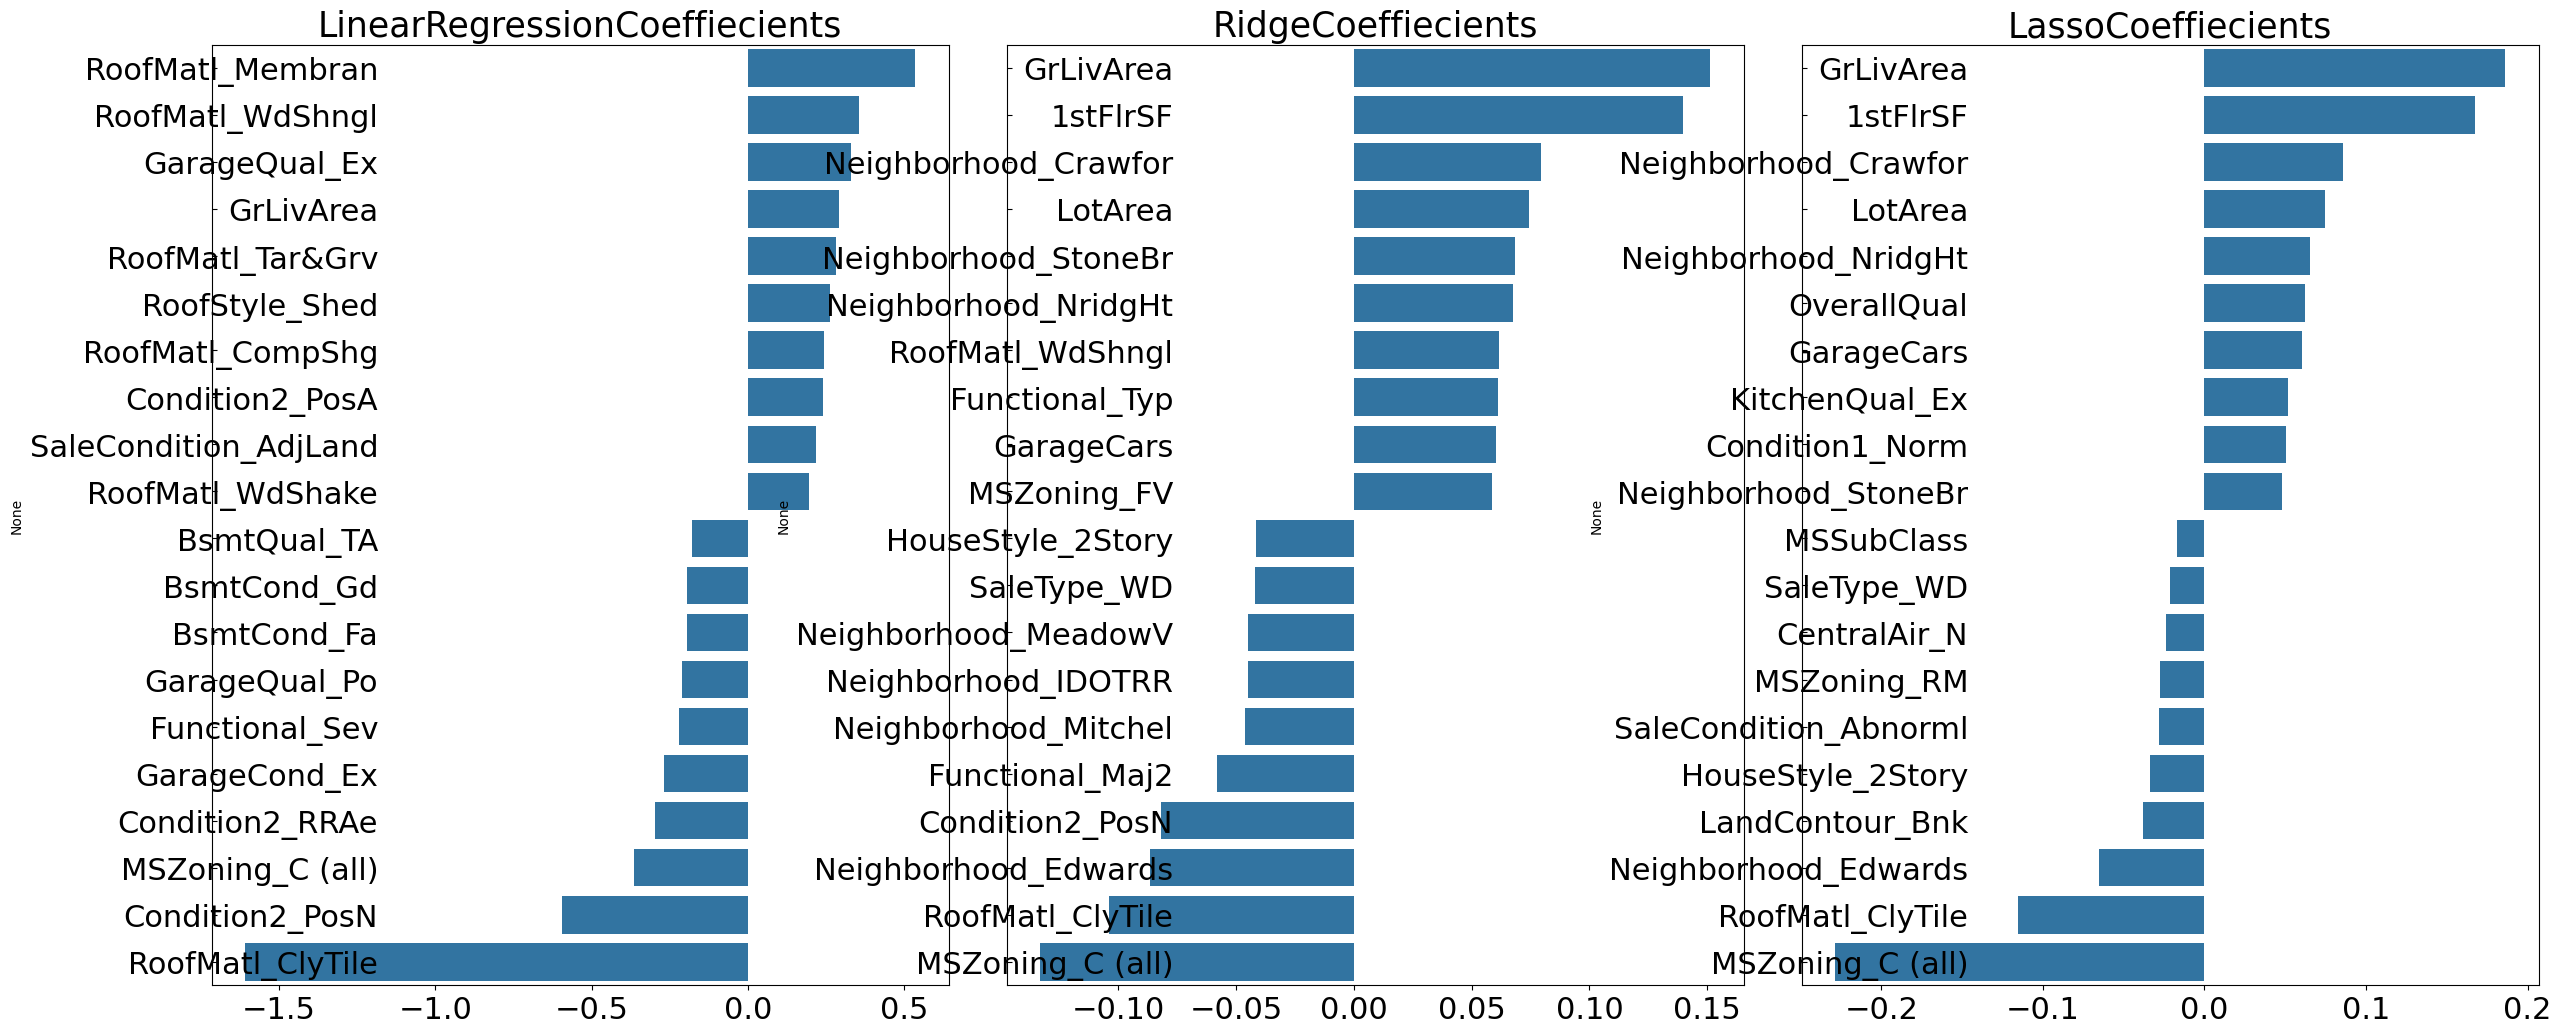

In [51]:
visualize_coefficient(models, X_features)

> 실행결과 집의 크기가 집값에 가장 큰 영향을 주었으며 1층의 크기도 집값에 어느 정도 영향을 준 것을 볼 수 있다.